In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/Users/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import os

import numpy as np
import torch
import torch.cuda.amp as amp
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, datasets, sample, audio, utils, viz

# Train impulse dataset

Train the impulse dataset to see if things looks sane locally before running remotely.

In [3]:
p, n_examples, n_samples = model.HParams(n_chans=128, n_layers=8, dilation_stacks=2, mixed_precision=False), 2**13, 4
ds = datasets.StereoImpulse(n_examples, n_samples, p, probs=(0.3, 0.7))
m = model.Wavenet(p)
animation = viz.LearningAnimation(n_samples)
t = train.Trainer(m, ds, None, train.HParams(max_epochs=1), animation)

In [4]:
os.environ['WANDB_MODE'] = 'disabled'

In [5]:
t.train()
animation.render('training.gif')

1:127 loss 0.94244 lr 9.339317e-08: 100%|██████████| 128/128 [01:09<00:00,  1.84it/s]


<Figure size 2592x576 with 0 Axes>

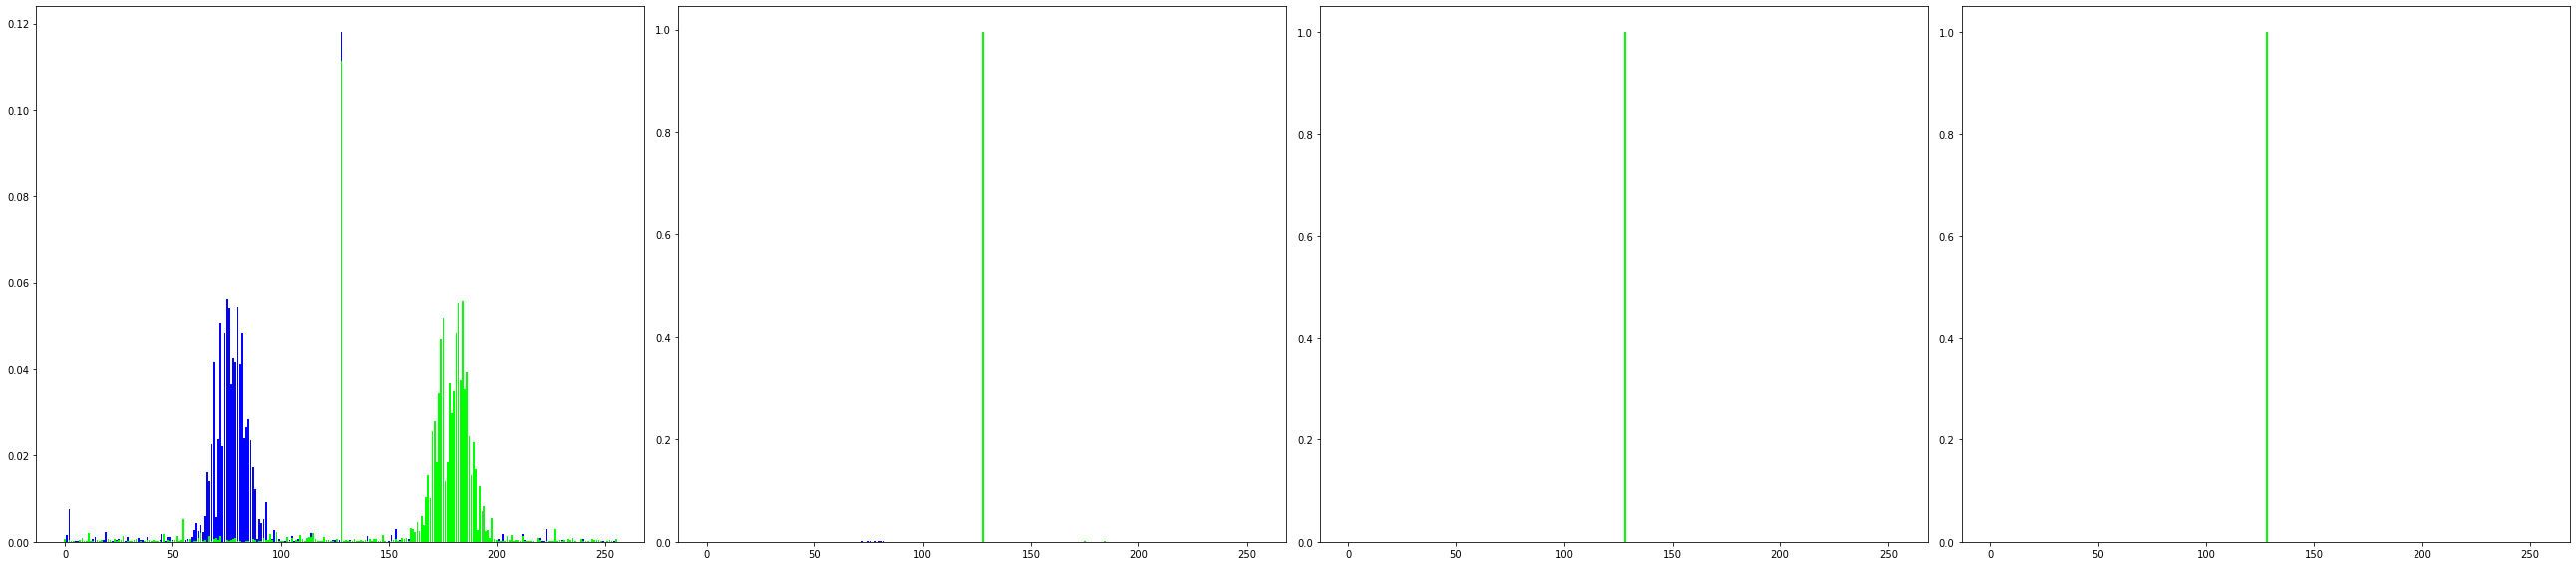

In [6]:
device = "cpu"
if torch.cuda.is_available():
    device = torch.cuda.current_device()

x, y = ds[:10]
x = x.to(device)
y = y.to(device)

logits, _ = m.forward(x) 
plt.clf()
viz.plot_stereo_sample_distributions(logits, 0)
plt.show()